In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
data = pd.read_csv('prime.csv')

In [152]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [154]:
data.shape

(8807, 12)

In [141]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [155]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [156]:
data['director']=data['director'].fillna('Unknown',inplace=False)

In [157]:
data.iloc[:,1:8:6]

,type,release_year
0,Movie,2020
1,TV Show,2021
2,TV Show,2021
3,TV Show,2021
4,TV Show,2021
...,...,...
8802,Movie,2007
8803,TV Show,2018
8804,Movie,2009
8805,Movie,2006


(array([6131.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2676.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

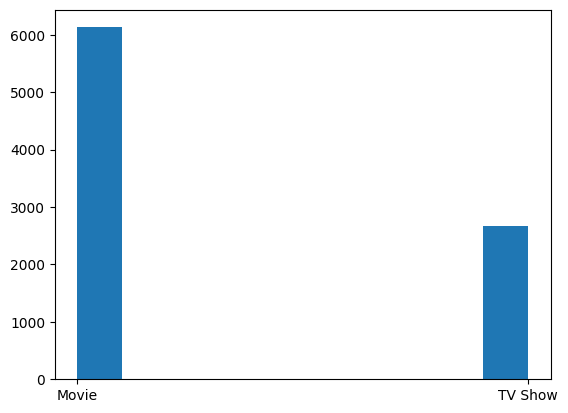

In [158]:
plt.hist(data['type']) #count of the movies and tv shows

# count of the movies and tvshows that have been released from year 1925 to 2021

Text(0, 0.5, 'Count')

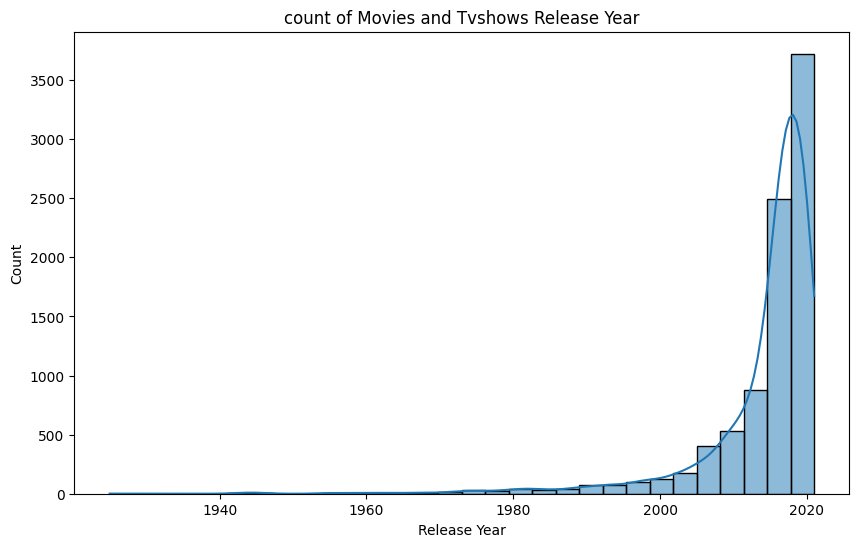

In [193]:
plt.figure(figsize=(10, 6))
sns.histplot(data['release_year'], bins=30, kde=True)
plt.title('count of Movies and Tvshows Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')

In [181]:
data['rating'].isnull().sum()

4

In [195]:
repeated_rating = data['rating'].mode()[0] #filling the missing values of rating with mode
data['rating']=data['rating'].fillna(repeated_rating,inplace=False)

In [183]:
data.groupby(['type', 'rating']).agg({'release_year': 'count'}) #from this we can see the ratings of the movies and tv shows this shows a high rating of movies.

release_year
type    rating                
Movie   66 min               1
        74 min               1
        84 min               1
        G                   41
        NC-17                3
        NR                  75
        PG                 287
        PG-13              490
        R                  797
        TV-14             1427
        TV-G               126
        TV-MA             2064
        TV-PG              540
        TV-Y               131
        TV-Y7              139
        TV-Y7-FV             5
        UR                   3
TV Show NR                   5
        R                    2
        TV-14              733
        TV-G                94
        TV-MA             1147
        TV-PG              323
        TV-Y               176
        TV-Y7              195
        TV-Y7-FV             1

In [184]:
data.iloc[:,1:4]

,type,title,director
0,Movie,Dick Johnson Is Dead,Kirsten Johnson
1,TV Show,Blood & Water,Unknown
2,TV Show,Ganglands,Julien Leclercq
3,TV Show,Jailbirds New Orleans,Unknown
4,TV Show,Kota Factory,Unknown
...,...,...,...
8802,Movie,Zodiac,David Fincher
8803,TV Show,Zombie Dumb,Unknown
8804,Movie,Zombieland,Ruben Fleischer
8805,Movie,Zoom,Peter Hewitt


Text(0, 0.5, 'Count')

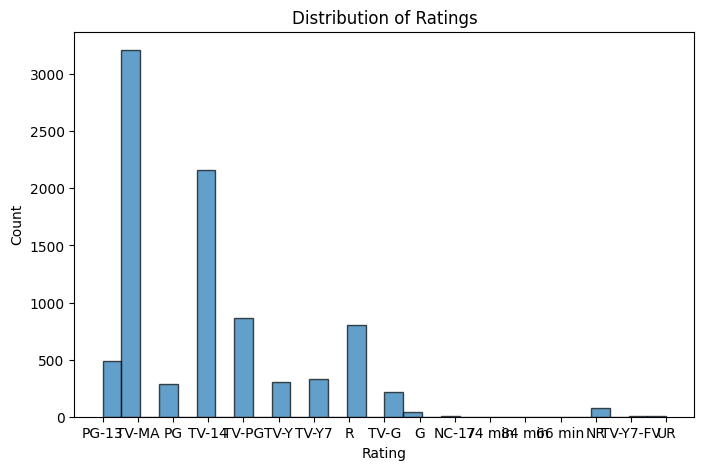

In [189]:
plt.figure(figsize=(8, 5))
plt.hist(data['rating'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

In [190]:
data['country']=data['country'].fillna('Unknown',inplace=False)

In [191]:
data.iloc[:,1:6:4]

,type,country
0,Movie,United States
1,TV Show,South Africa
2,TV Show,Unknown
3,TV Show,Unknown
4,TV Show,India
...,...,...
8802,Movie,United States
8803,TV Show,Unknown
8804,Movie,United States
8805,Movie,United States


Text(0, 0.5, 'Count')

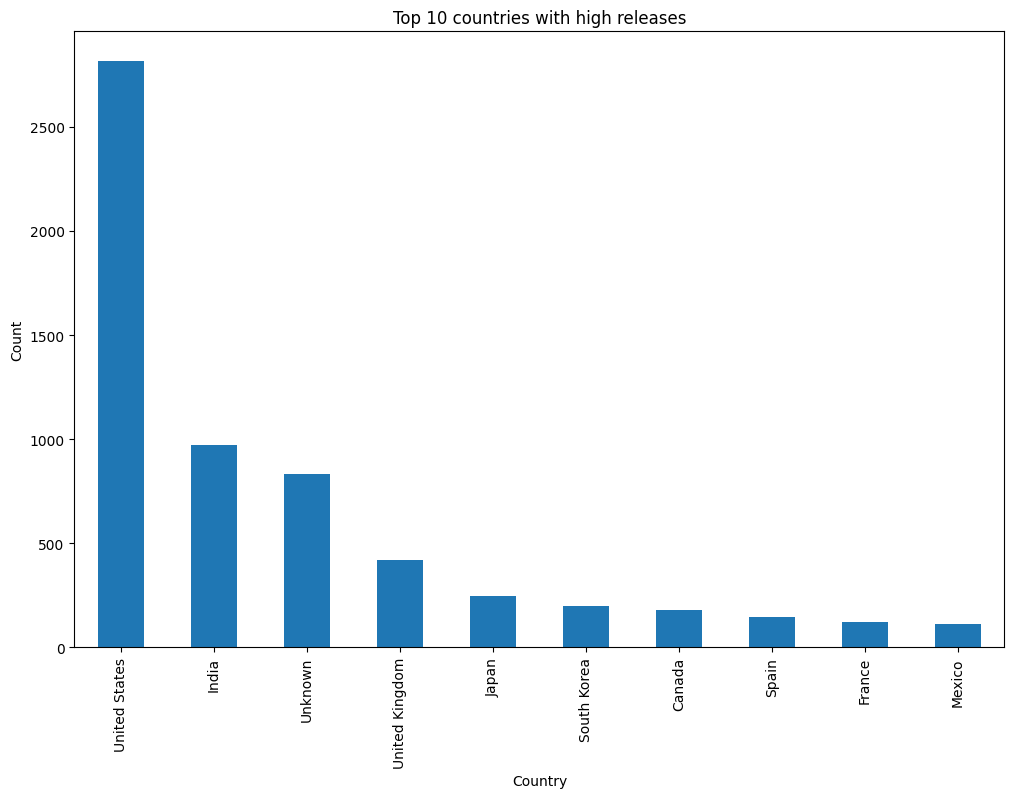

In [194]:
country_counts = data['country'].value_counts().head(10)  # Displaying the top 10 countries
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar')
plt.title('Top 10 countries with high releases')
plt.xlabel('Country')
plt.ylabel('Count')
